In [1]:
#plot the drift ... and the diffusion. 
#code from the cracked bassoon. 
import hddm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from tqdm import tqdm


def setupfig():
    """Tweak for the target journal.
    """
    single_column = (3.346, 2.301)
    fig = plt.figure(figsize=single_column)
    gs = GridSpec(3, 1, height_ratios=[1, 2, 1], hspace=0)
    return fig, gs


def delabel(ax):
    """Strip labels.
    """
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])


def kde(ax, x, mx, c):
    """Plot a KDE for reaction times.
    """
    x = x[x <= mx]
    bandwidth = .8 * x.std() * x.size ** (-1 / 5.)
    support = np.linspace(0, mx, 500)
    kernels = []

    for x_i in tqdm(x):

        kernel = norm(x_i, bandwidth).pdf(support)
        kernels.append(kernel)
        density = np.sum(kernels, axis=0)

    my = np.max(density)
    ax.plot(support, density, c=c)
    ax.fill_between(support, 0, density, alpha=.5, facecolor=c)
    ax.set_ylim(0, my * 1.05)
    delabel(ax)

    return my


def traces(ax, n, mx, **params):
    """Draw example of diffusions.
    """
    x = np.linspace(0, mx, 101)
    delta = x[1]
    nd_samples = np.round(params['t'] / delta).astype(int)
    d_samples = len(x) - nd_samples
    y0 = np.zeros(nd_samples) * np.nan
    y0[-1] = 0

    for i in range(n):

        y1 = np.cumsum(
            norm.rvs(params['v'] * delta, np.sqrt(delta), size=d_samples))
        y = params['a'] * params['z'] + np.concatenate([y0, y1])

        try:

            idx1 = np.where(y > params['a'])[0][0] + 1

        except:

            idx1 = np.inf

        try:

            idx2 = np.where(y < 0)[0][0] + 1

        except:

            idx2 = np.inf

        if idx1 < idx2:

            y[idx1:] = np.nan
            ax.plot(x, y, c='C0', zorder=-12, alpha=.25)

        if idx2 < idx1:

            y[idx2:] = np.nan
            ax.plot(x, y, c='C3', zorder=-11, alpha=.25)

        ax.set_ylim(0, params['a'])
        ax.set_xlim(0, mx)
        delabel(ax)


def ddmfig(**params):
    """Draw a DDM plot with the given parameter values.
    """
    mx = 3.5
    size = 15000
    ntraces = 2

    # set up fig
    fig, gs = setupfig()

    # traces
    ax = plt.subplot(gs[1])
    traces(ax, ntraces, mx, **params)

    # data for kdes
    df, _ = hddm.generate.gen_rand_data(params, subjs=1, size=size)

    # top KDE
    ax = plt.subplot(gs[0])
    my = kde(ax, df[df.response == 1].rt.values, mx, 'C0')

    # bottom KDE
    ax = plt.subplot(gs[2])
    kde(ax, df[df.response == 0].rt.values, mx, 'C3')
    ax.set_ylim(0, my * 1.05)
    ax.invert_yaxis()

    # remove whitespace around fig
    plt.tight_layout(0)


def main():

    np.random.seed(25)
    ddmfig(v=0.7, a=1.5, t=0.6, z=0.5)
    plt.savefig('tmp.pdf')


if __name__ == '__main__':

    main()

/home/krista/anaconda3/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in less
 36%|███▌      | 3991/11136 [00:14<00:25, 281.62it/s]

KeyboardInterrupt: 

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in less

 39%|███▊      | 3228/8366 [00:07<00:11, 435.33it/s]

KeyboardInterrupt: 

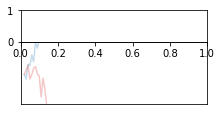

 39%|███▊      | 3228/8366 [00:23<00:36, 140.11it/s]

In [2]:
a=.999494
z=0.477116

hv_dict = {'a': a,  'z': z, 't':.1180050, 'v': .3197966}
lv_dict = {'a': a,  'z': z, 't':.1194516, 'v': .3156021}

hc_dict = {'a': a,  'z': z, 't':.1142886, 'v': .3268281}
lc_dict = {'a': a,  'z': z, 't':.1186553, 'v': .4838878}

ddmfig(**hv_dict)

In [ ]:
ddmfig(**hc_dict)

In [ ]:
ddmfig(**lc_dict)

In [ ]:
ddmfig(**lv_dict)

In [33]:
t = np.linspace(0,.3,)

In [34]:
lv_dict['t'], hv_dict['t']

(0.1194516, 0.118005)

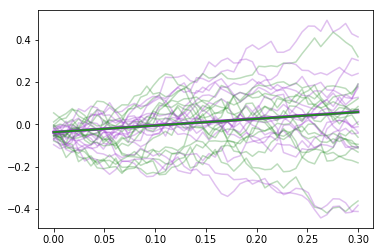

In [40]:
for n in range(15):
    hv=hv_dict['v']*(t-hv_dict['t']) + np.cumsum(np.random.normal(loc=0, scale=.03,size=50))
    plt.plot(t, hv, 'darkorchid', alpha=0.3)
    lv=lv_dict['v']*(t-lv_dict['t']) + np.cumsum(np.random.normal(loc=0, scale=.03,size=50))
    plt.plot(t,lv, 'forestgreen', alpha=0.3)
plt.plot(t, hv_dict['v']*(t-hv_dict['t']),
                                  linewidth=3,color='darkorchid', )
plt.plot(t, lv_dict['v']*(t-lv_dict['t']),
         linewidth=2,color='forestgreen')
# plt.xlim(-3,60)
# plt.ylim(0,1)
plt.savefig('vol_lba.png')


(-3, 40)

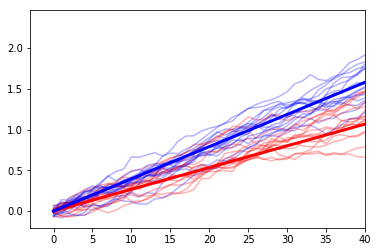

In [41]:
t=np.linspace(0,4)
for n in range(15):
    hc=hc_dict['v']*t + np.cumsum(np.random.normal(loc=0, scale=.04,size=50))
    plt.plot(hc, 'r', alpha=0.3)
    lc=lc_dict['v']*t + np.cumsum(np.random.normal(loc=0, scale=.04,size=50))
    plt.plot(lc, 'b', alpha=0.3)
plt.plot(hc_dict['v']*t,
                                  linewidth=3,color='r', )
plt.plot(lc_dict['v']*t,
         linewidth=3,color='b')
plt.savefig('conflict_lba.png')
plt.xlim(-3,40)
# plt.ylim(-2,2)
#     plt.ylim(0,1)
# lc=lc_dict['v']*t+np.cumsum(100*np.random.rand(30))

In [ ]:
plt.plot(t, hc, label='hc')
plt.plot(t, lc, label='lc')
plt.legend()